In [1]:
import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
from carbon_math import carbon_flux
import xesmf as xe
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xesmf as xe
from scipy.stats import linregress
from funcx import cut_aco2, cut_eq_vars, proc_landschutzer, proc_landschutzer_old,cut_sst,cut_regrid_sst
client = Client()
client


In [59]:
#Example of the variables in the BGC.
ls /OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/

adic/            fe/              stf07/          surface_o2/
alk/             no3/             stf10/          surface_phy/
caco3/           o2/              st_ocean/       surface_zoo/
caco3_sediment/  paco2/           surface_adic/   time/
det/             pco2/            surface_alk/    total_aco2_flux/
det_sediment/    phy/             surface_caco3/  total_co2_flux/
dic/             pprod_gross/     surface_det/    xt_ocean/
ensemble/        pprod_gross_2d/  surface_dic/    yt_ocean/
export_inorg/    scalar_axis/     surface_fe/     zoo/
export_prod/     stf03/           surface_no3/


In [2]:
dat=xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/',consolidated=True)

In [12]:
dat.det_sediment

<xarray.DataArray 'det_sediment' (time: 720, ensemble: 96, yt_ocean: 300, xt_ocean: 360)>
dask.array<xarray-det_sediment, shape=(720, 96, 300, 360), dtype=float32, chunksize=(1, 96, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    cell_methods:  time: mean
    coordinates:   geolon_t geolat_t
    long_name:     Accumulated DET in sediment at base of water column
    units:         mmolN/m^2

In [ ]:
#BGC PARAMS ON GADI - ['/g/data/v14/pas548/cm-runs/CAFE-A14/mem'+ str(members[mem]).zfill(3) +'/INPUT/bgc_param.nc' - Are they here somewhere too?

In [3]:
#client.restart()

In [65]:
'''Preprocessing functions - Need to really describe what is going on for each of these.
Possible to combine into a general function that given something like

General_function(type=[one of bgc, physics, atmos],variable='NAME' (or array NAMES)?, Cut to Troppac? True/False, Need to regrid somehow? RegridMethod, )

'''
#cut_aco2()
#cut_eq_vars()
#proc_landschutzer()
#sst_obs.close()
#cut_sst
#cut_regrid_sst()

Reuse existing file: bilinear_40x170_98x170.nc


In [2]:
#Open CAFE60 processed data
CAFE_CO2_flux_anth=xr.open_dataset('/scratch1/pit071/CAFE60/eqpac_BGC.nc')

#Open Landshutzer data
landschutzer_CO2=xr.open_dataset('/scratch1/pit071/carbon_data_ch2/landshutzer_regrid.nc').fgco2_smoothed
old_land_clim=xr.open_dataset('/scratch1/pit071/carbon_data_ch2/landshutzer_old_regrid.nc')

In [3]:
sst_cafe=xr.open_dataset('/scratch1/pit071/CAFE60/sst.nc').sst
sst_obs=xr.open_dataset('/scratch1/pit071/CAFE60/sst.mnmean.regrid.nc').sst
sst_obs=sst_obs.reindex(lat=sst_obs.lat[::-1])

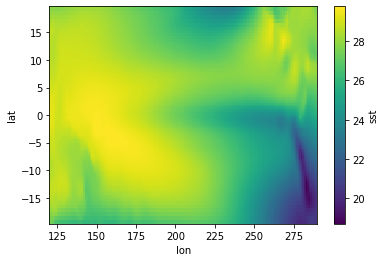

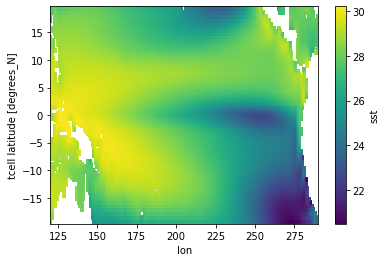

In [76]:
sst_obs.mean(dim='time').plot(),plt.show()
sst_cafe.mean(dim=['time','ensemble']).plot()

In [3]:
#Look at them
CAFE_CO2_flux_anth

<xarray.Dataset>
Dimensions:         (ensemble: 96, lat: 98, lon: 170, time: 456)
Coordinates:
  * ensemble        (ensemble) int32 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * time            (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lon             (lon) float64 120.5 121.5 122.5 123.5 ... 287.5 288.5 289.5
  * lat             (lat) float64 -19.36 -18.59 -17.85 ... 17.85 18.59 19.36
Data variables:
    stf10           (time, ensemble, lat, lon) float64 ...
    pprod_gross_2d  (time, ensemble, lat, lon) float64 ...
    export_prod     (time, ensemble, lat, lon) float64 ...
Attributes:
    calendar:                 julian
    cm-enkf_source:          commit 0141830a243704acbf6d8c8c843b161a39ec39fa
    contact_name:            Decadal Activity 1 - Data Assimilation
    control_name:            c5
    creation_date:           Sun Dec  1 23:38:56 2019
    data_assimilation_name:  d60
    description:             CAFE coupled ocean-atmosphere-seaice reanalysis ...
    enkf-c_source:           EnKF version 1.92.4
    ens_member_number:       1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...
    experiment_start_date:   19600101
    filename:                ocean_bgc_month.zarr
    forecast_name:           not applicable
    further_info_url:        https://research.csiro.au/dfp/
    grid_tile:               1
    grid_type:               mosaic
    institution:             CSIRO CAFE
    licence:                 ### To be advised ###
    metadata_description:    \n\tEach of the metadata keys added via the CAFE...
    model_source:            commit 2abb29f4384e68777721fa657850587f28efd85a
    nominal_resoltuion:      Atmosphere delta lat = 2.02degrees ; Atmosphere ...
    perturbation_name:       not applicable
    references:              OKane, T.J., Sandery, P.A., Monselesan, D.P., Sa...
    run_variant_name:        data assimilation
    title:                   AccessOcean-AM2

In [4]:
landschutzer_CO2

<xarray.DataArray 'fgco2_smoothed' (time: 456, lat: 98, lon: 170)>
[7596960 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lat      (lat) float64 -19.36 -18.59 -17.85 -17.15 ... 17.85 18.59 19.36
Attributes:
    regrid_method:  bilinear

Text(0.5, 1.0, 'CAFE CO2 flux Ensemble 1')

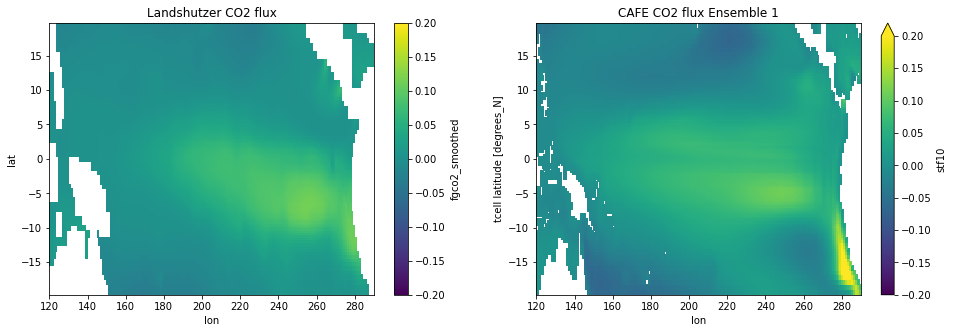

In [43]:
#Plot Landshutzer
plt.figure(figsize=(16,5))

plt.subplot(121)
(landschutzer_CO2.mean(dim='time')).plot(vmin=-.2,vmax=0.2)
plt.title('Landshutzer CO2 flux')

#Plot Cafe
plt.subplot(122)
(CAFE_CO2_flux_anth.sel(ensemble=1).mean(dim='time').stf10).plot(vmin=-.2,vmax=0.2)
plt.title('CAFE CO2 flux Ensemble 1')

bilinear_40x170_98x170.nc  first_tests.ipynb       test_ensemble_accuracy.ipynb
calculate_SOI_SST.ipynb    JRA_EQPAC_WINDSPEED.nc  test_ensemble_SST.ipynb
carbon_math.py             __pycache__/            windspeed.ipynb
dask-worker-space/         README.md


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/plot/plot.py:932: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/plot/plot.py:932: UserWarning: The following kwargs were not used by contour: 'color'
  primitive = ax.contour(x, y, z, **kwargs)


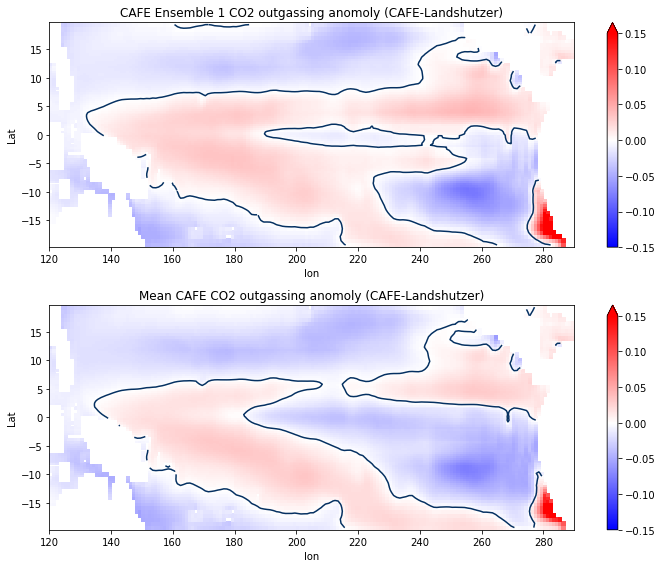

In [3]:
#Look at the difference between ensemble 1 and landschutzer
plt.figure(figsize=(10,8))
plt.subplot(211)
((CAFE_CO2_flux_anth.sel(ensemble=1).mean(dim='time').stf10)-landschutzer_CO2.mean(dim='time')).plot(vmin=-0.15,vmax=0.15,cmap='bwr')
((CAFE_CO2_flux_anth.sel(ensemble=1).mean(dim='time').stf10)-landschutzer_CO2.mean(dim='time')).plot.contour(levels=[0],color='k')
plt.title('CAFE Ensemble 1 CO2 outgassing anomoly (CAFE-Landshutzer)')
#Plot the difference between the model mean and landschutzr
plt.ylabel('Lat')


plt.subplot(212)
(CAFE_CO2_flux_anth.stf10.mean(dim=['time','ensemble'])-landschutzer_CO2.mean(dim='time')).plot(vmin=-0.15,vmax=0.15,cmap='bwr')
(CAFE_CO2_flux_anth.stf10.mean(dim=['time','ensemble'])-landschutzer_CO2.mean(dim='time')).plot.contour(levels=[0],color='k')
plt.title('Mean CAFE CO2 outgassing anomoly (CAFE-Landshutzer)')
plt.ylabel('Lat')
plt.tight_layout()




In [49]:
sst_cafe

<xarray.DataArray 'sst' (time: 456, ensemble: 96, lat: 98, lon: 170)>
[729308160 values with dtype=float32]
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lon       (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * lat       (lat) float64 -19.36 -18.59 -17.85 -17.15 ... 17.85 18.59 19.36
Attributes:
    cell_methods:   time: mean
    long_name:      Potential temperature
    standard_name:  sea_surface_temperature
    units:          degrees C
    valid_range:    [-10. 500.]

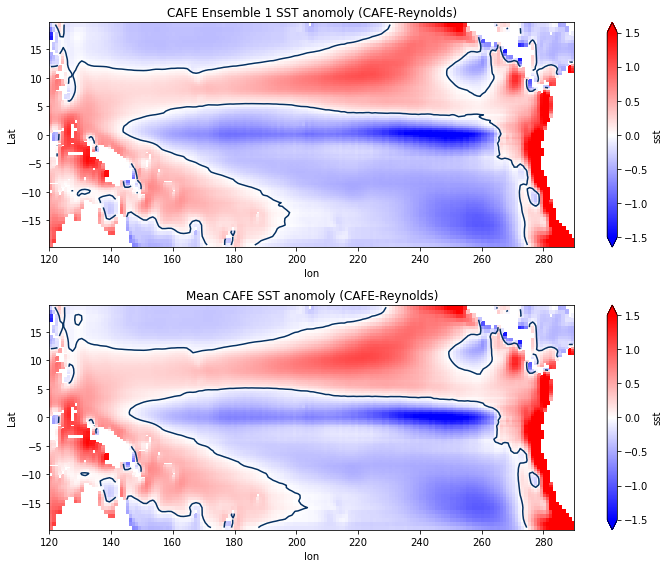

In [81]:
#Look at the difference between ensemble 1 and landschutzer
plt.figure(figsize=(10,8))
plt.subplot(211)
((sst_cafe.sel(ensemble=1).mean(dim='time'))-sst_obs.mean(dim='time')).plot(vmin=-1.5,vmax=1.5,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
((sst_cafe.sel(ensemble=1).mean(dim='time'))-sst_obs.mean(dim='time')).plot.contour(levels=[0])
plt.title('CAFE Ensemble 1 SST anomoly (CAFE-Reynolds)')
#Plot the difference between the model mean and landschutzr
plt.ylabel('Lat')


plt.subplot(212)
(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot(vmin=-1.5,vmax=1.5,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot.contour(levels=[0])
plt.title('Mean CAFE SST anomoly (CAFE-Reynolds)')
plt.ylabel('Lat')
plt.tight_layout()

In [4]:
#Check the biases quick

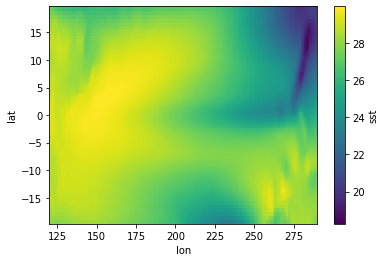

In [19]:
sst_obs.sel(time=slice('2000-01-01','2020-01-01')).mean(dim='time').plot()

In [63]:
#Calculate RMS and bias real quick
model=CAFE_CO2_flux_anth.stf10#.mean(dim=['time','ensemble'])
obs=landschutzer_CO2#.mean(dim='time')

diff=model-obs
diff_log=np.log10(model)-np.log10(obs)
bias=10**(diff_log)
rms=np.sqrt(diff**2)

/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


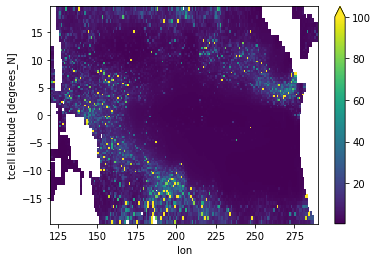

In [66]:
bias.mean(dim=['ensemble','time']).plot(vmax=100)

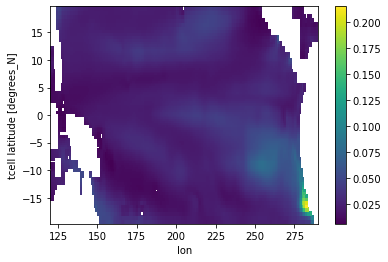

In [65]:
rms.mean(dim=['ensemble','time']).plot()

In [83]:
bias_ens=np.abs(bias).idxmin(dim='ensemble')
rms_ens=rms.idxmin(dim='ensemble')

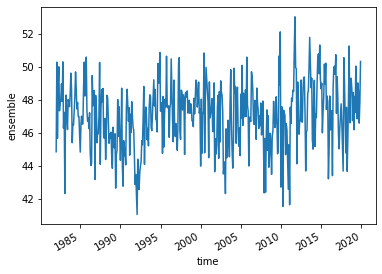

In [85]:
rms_ens.mean(dim=['lat','lon']).plot()

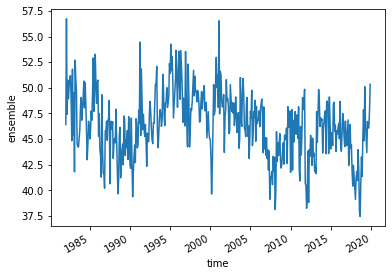

In [86]:
bias_ens.mean(dim=['lat','lon']).plot() #Which is the best ensemble member?

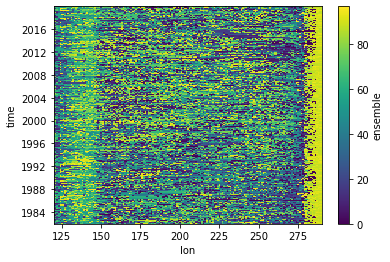

In [62]:
ens.argmax(dim='lat').plot()

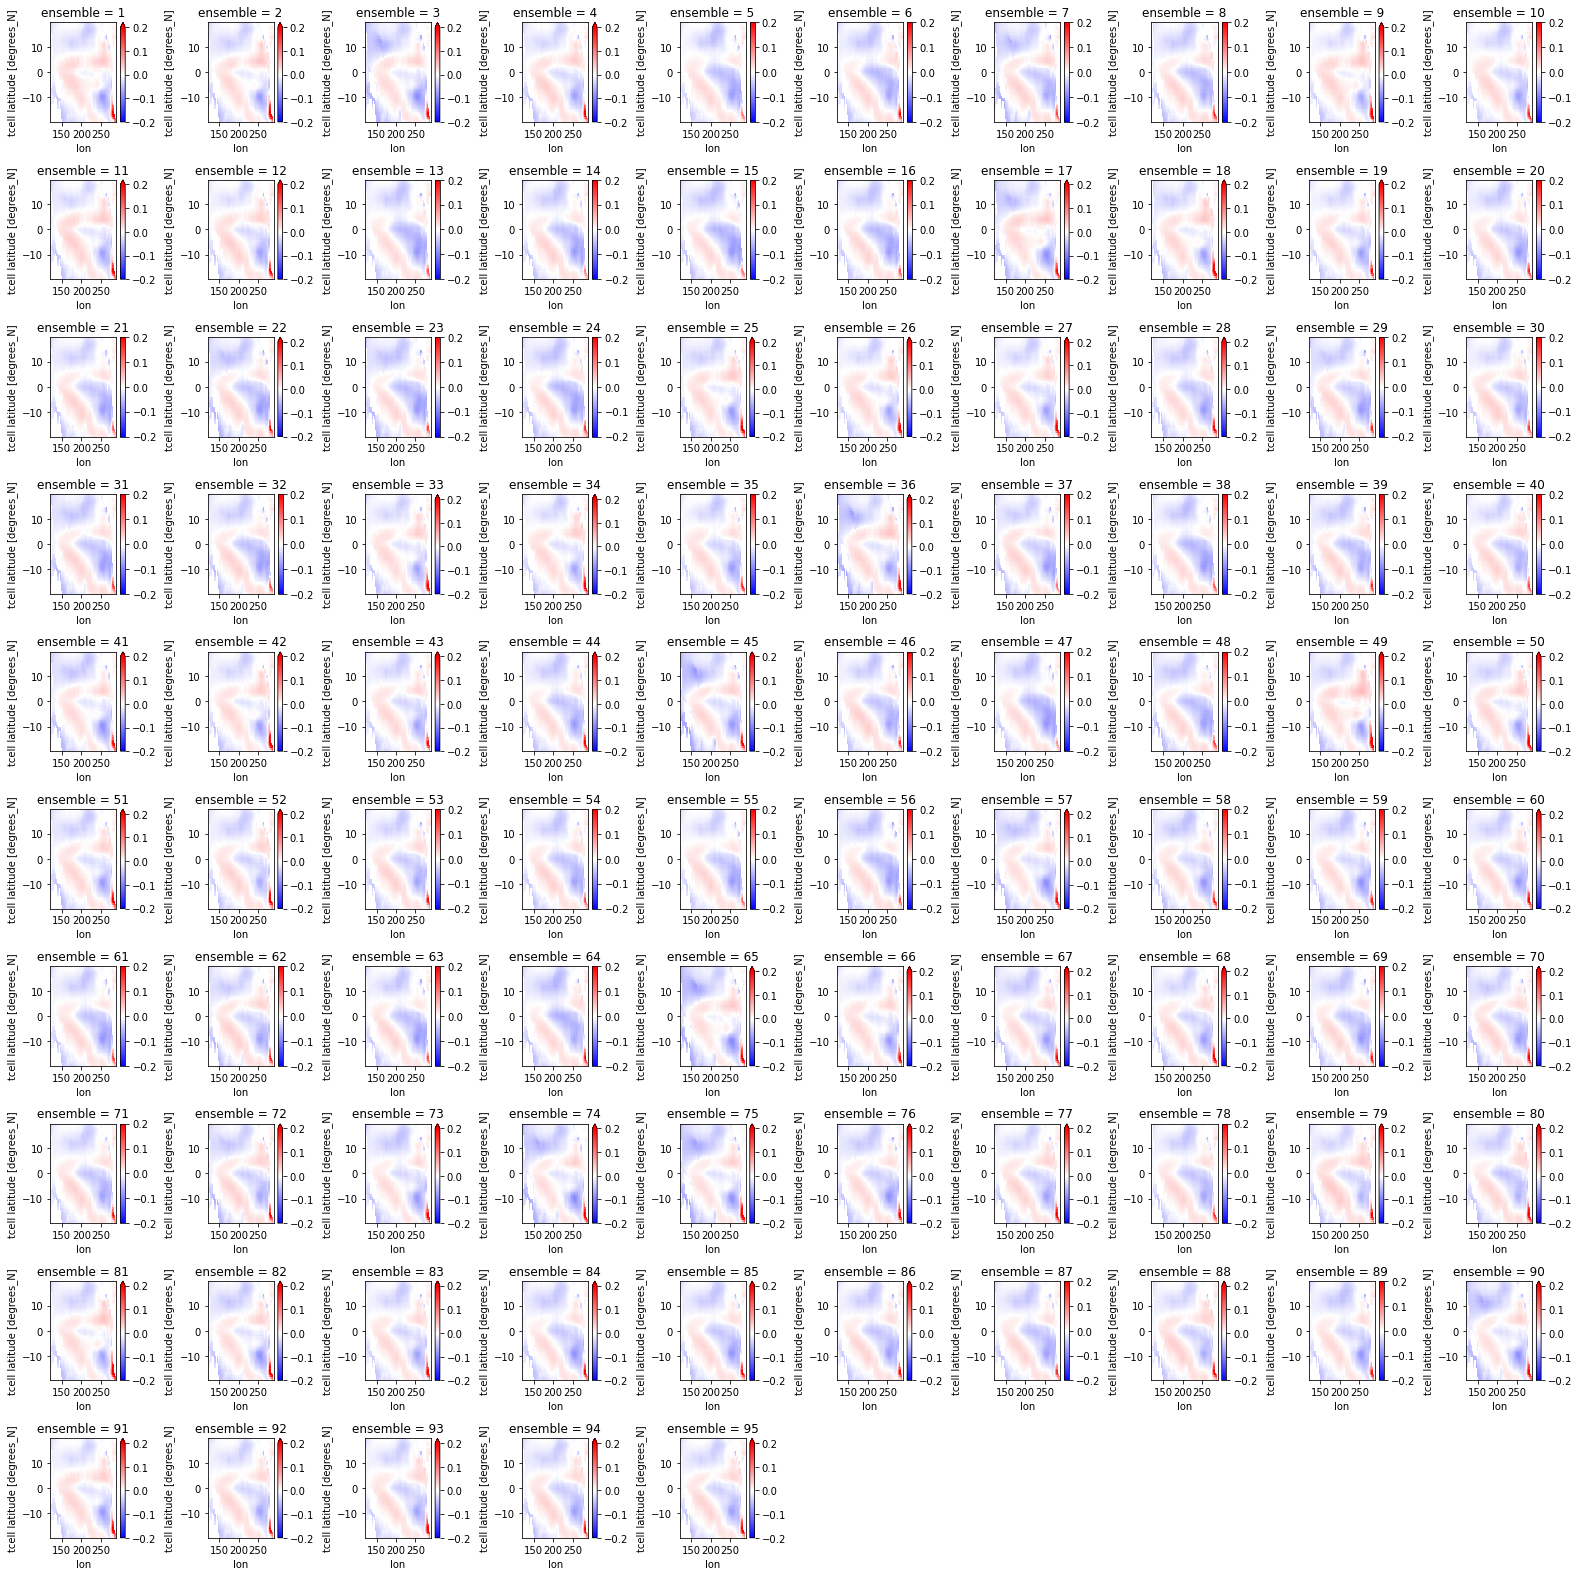

In [44]:
#Anomaly from Obs
#An anoying plot but a good start
#Basically, how do the models vary from the landschutzer 'truth'
plt.figure(figsize=(22,22))
for i in np.arange(1,96):
    plt.subplot(10,10,i)
    (CAFE_CO2_flux_anth.sel(ensemble=i).mean(dim='time').stf10-landschutzer_CO2.mean(dim='time')).plot(vmin=-0.2,vmax=0.2,cmap='bwr')

plt.tight_layout()    
plt.show()

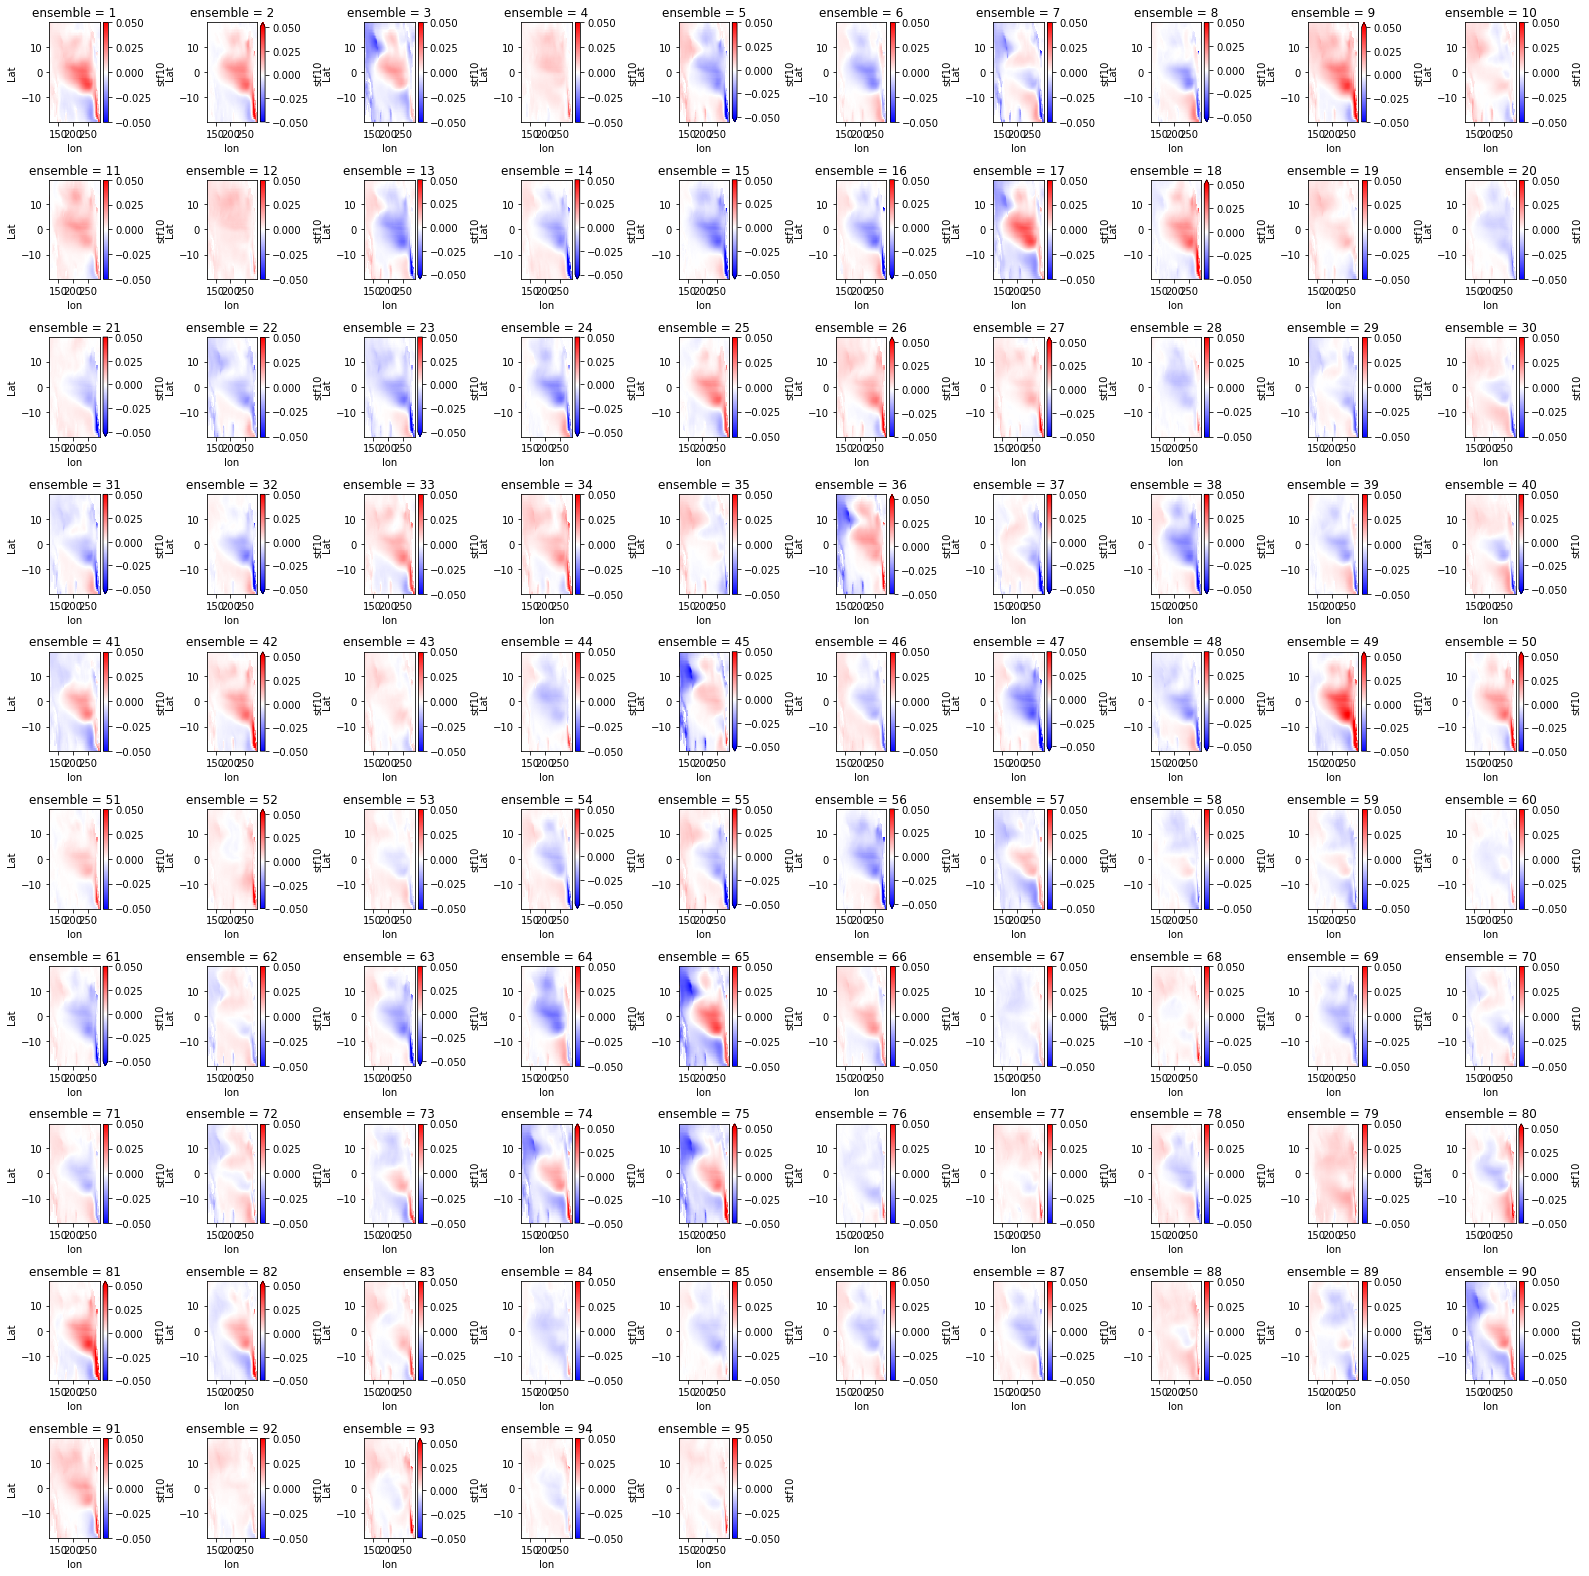

In [45]:
#Co2 FlUX Anomaly from model
#Ok they all look the same. How about we look at the difference from the mean model. 
model_mean=CAFE_CO2_flux_anth.mean(dim=['ensemble','time']).stf10
plt.figure(figsize=(22,22))
for i in np.arange(1,96):
    ax=plt.subplot(10,10,i)
    (CAFE_CO2_flux_anth.sel(ensemble=i).mean(dim='time').stf10-model_mean).plot(vmin=-0.05,vmax=0.05,cmap='bwr')
    ax.set_ylabel('Lat')
plt.tight_layout()    
plt.show()

/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'CO2 flux comparisons')

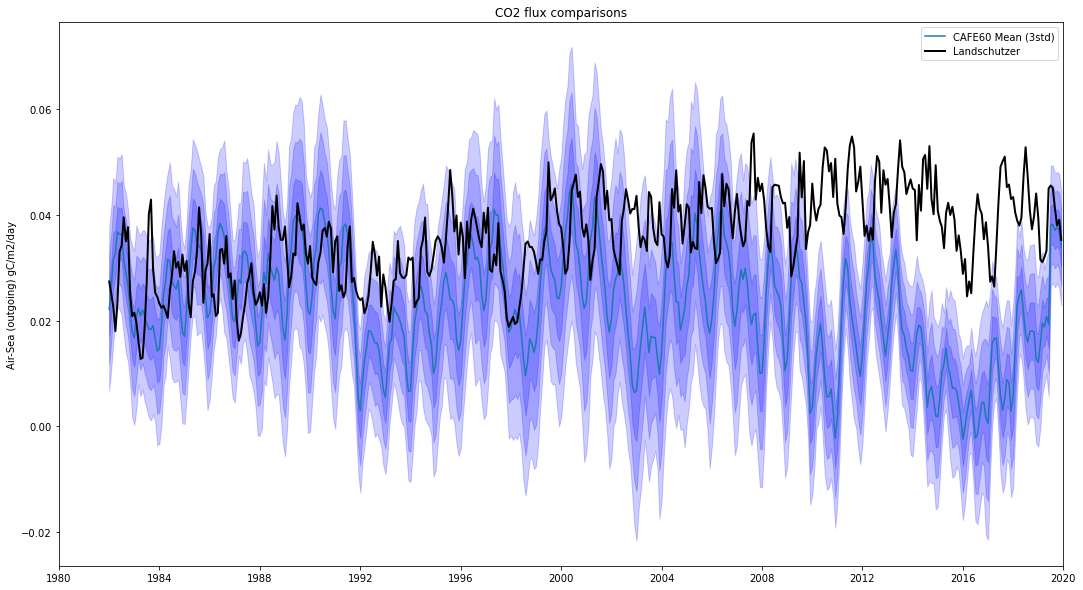

In [86]:
#Ok lets calculate the mean and std for each of the models. 
latlon=[-15,15,150,275]
cafe_co2_std=CAFE_CO2_flux_anth.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
cafe_co2_mean=CAFE_CO2_flux_anth.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
land_co2_std=landschutzer_CO2.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
land_co2_mean=landschutzer_CO2.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])

err=cafe_co2_mean.std(dim='ensemble')
m=cafe_co2_mean.mean(dim='ensemble')

plt.figure(figsize=(18,10))
plt.plot(m.time,m.stf10)
plt.fill_between(err.time.values,m.stf10+(err*1).stf10,m.stf10-(err*1).stf10,alpha=0.2,color='blue')
plt.fill_between(err.time.values,m.stf10+(err*2).stf10,m.stf10-(err*2).stf10,alpha=0.2,color='blue')
plt.fill_between(err.time.values,m.stf10+(err*3).stf10,m.stf10-(err*3).stf10,alpha=0.2,color='blue')

plt.plot(land_co2_mean.time,land_co2_mean,c='k',linewidth=2)
plt.legend(['CAFE60 Mean (3std)','Landschutzer'])
plt.xlim(['1980-01-01','2020-01-01'])
plt.ylabel('Air-Sea (outgoing) gC/m2/day')
plt.title('CO2 flux comparisons')

Text(0.5, 1.0, 'CO2 flux for 96 ensemble members in gC/m2/day: [[-15, 15, 150, 275], [-15, 0, 225, 250], [0, 15, 225, 250], [-15, 15, 225, 250], [-15, 15, 200, 225], [-15, 15, 175, 200], [-15, 15, 150, 175]]')

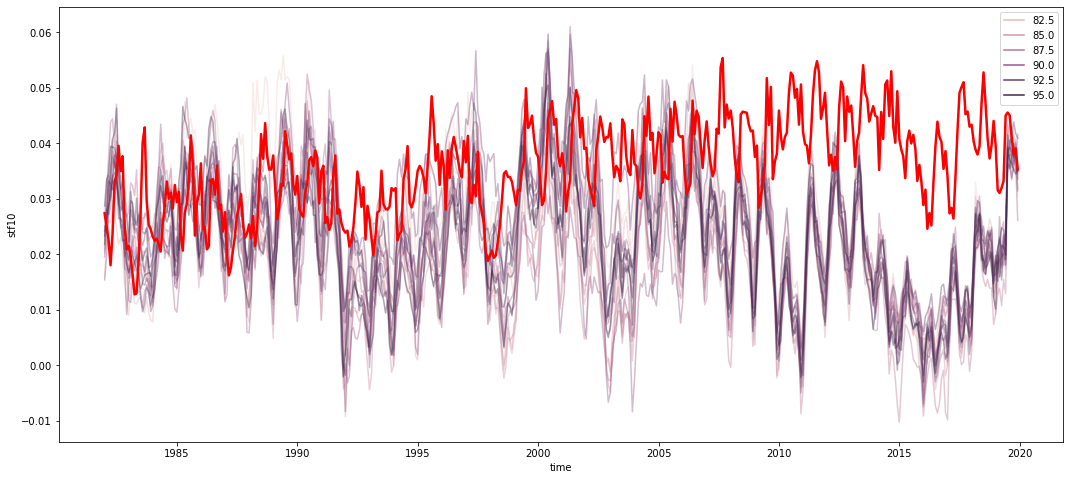

In [88]:
#A different method but not as nice. Original seaborn method. Keeping it for something different. 

cafe_co2_pd=cafe_co2_mean.stf10.T.to_dataframe().stf10.reset_index()
land_co2_pd=land_co2_mean.to_dataframe().reset_index()

plt.figure(figsize=(18,8))
palette = sns.color_palette("mako_r", 96)
sns.lineplot(data=cafe_co2_pd.where(cafe_co2_pd.ensemble>80),x='time',y='stf10',hue='ensemble',alpha=0.4, estimator='mean', ci=95)
sns.lineplot(data=land_co2_pd,x='time',y='fgco2_smoothed',color='red',linewidth=2.5)
ax.set_title('CO2 flux for 96 ensemble members in gC/m2/day: '+str(locs))

/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Whole EqPac : -32.116359643588986% err


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


SouthEast EqPac : 108.94881559919986% err


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


NorthEast EqPac : -30.706586087810063% err


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


All East EqPac : -5.589238208228077% err


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Central EqPac : -2.494964867879411% err


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Dateline EqPac : 6.923205016571456% err


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


FarWest EqPac : -44.45912426194419% err


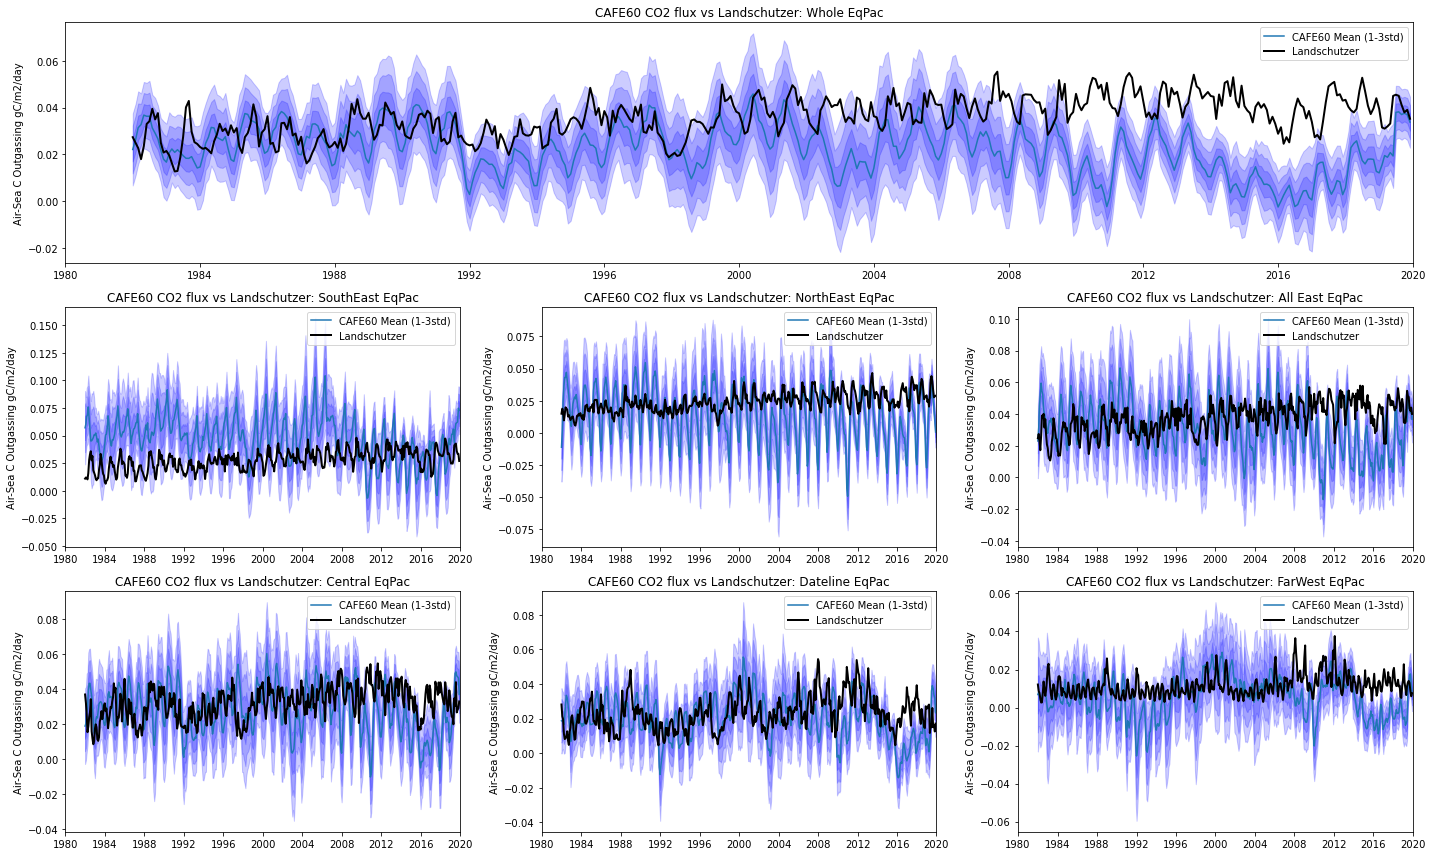

<xarray.Dataset>
Dimensions:      (ensemble: 96, region: 7)
Coordinates:
  * ensemble     (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * region       (region) int64 0 1 2 3 4 5 6
Data variables:
    percenterr   (region, ensemble) float64 -10.34 -12.49 ... -17.51 -28.37
    bias         (region, ensemble) float64 -0.005173 -0.006821 ... -0.004431
    mae          (region, ensemble) float64 0.01146 0.01315 ... 0.01021 0.01001
    region_name  (region) <U15 'Whole EqPac' ... 'FarWest EqPac'


In [89]:
#Ok first big plot. Regionality to look at the timeseries and see how they perform

labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

all_err=[]
for i,latlon in enumerate(locs):
    cafe_co2_std=CAFE_CO2_flux_anth.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    cafe_co2_mean=CAFE_CO2_flux_anth.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    land_co2_std=landschutzer_CO2.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    land_co2_mean=landschutzer_CO2.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])

    err=cafe_co2_mean.std(dim='ensemble')
    m=cafe_co2_mean.mean(dim='ensemble')
    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
    ax.plot(m.time,m.stf10)
    ax.fill_between(err.time.values,m.stf10+(err*1).stf10,m.stf10-(err*1).stf10,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.stf10+(err*2).stf10,m.stf10-(err*2).stf10,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.stf10+(err*3).stf10,m.stf10-(err*3).stf10,alpha=0.2,color='blue')

    ax.plot(land_co2_mean.time,land_co2_mean,c='k',linewidth=2)
    ax.legend(['CAFE60 Mean (1-3std)','Landschutzer'])
    ax.set_xlim(['1980-01-01','2020-01-01'])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    #ax.set_title('CO2 flux comparisons')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])

    
    #Calculate biases
    
    #These biases might be backwards.
    perc_err=(((cafe_co2_mean.stf10-land_co2_mean)/land_co2_mean)*100).mean(dim='time')
    bias=(cafe_co2_mean.stf10-land_co2_mean).mean(dim='time')
    mae=np.abs(cafe_co2_mean.stf10-land_co2_mean).mean(dim='time')
    print(labels[i]+' : '+str(perc_err.mean(dim='ensemble').values) + '% err')
    perc_err.name='percenterr'
    bias.name='bias'
    mae.name='mae'
    err_stats=xr.merge([perc_err,bias,mae],compat='override')
    err_stats['region']=i
    err_stats['region_name']=labels[i]
    all_err.append(err_stats)
    
regional_err=xr.concat(all_err,dim='region')
regional_err.to_netcdf('/scratch1/pit071/CO2_flux_error.nc')
plt.tight_layout()
plt.show()
print(regional_err)

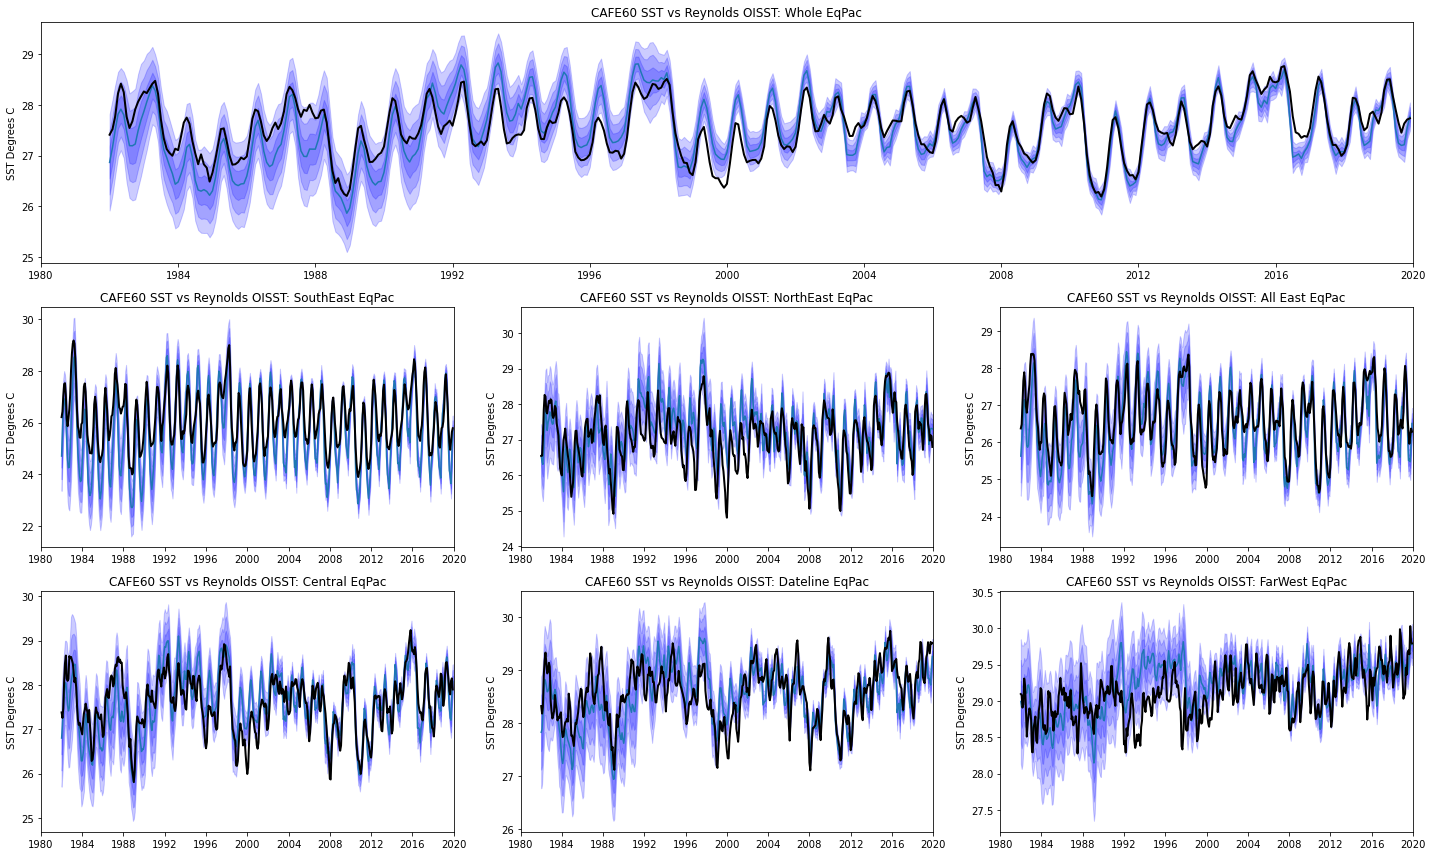

In [90]:
##SST!

labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

all_err=[]
#sst_obs
#sst_cafe
for i,latlon in enumerate(locs):
    sst_cafe_mean=sst_cafe.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])

    sst_obs_mean=sst_obs.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])

    err=sst_cafe_mean.std(dim='ensemble')
    m=sst_cafe_mean.mean(dim='ensemble')
    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)

    ax.plot(m.time,m)
    ax.fill_between(err.time.values,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m+(err*3),m-(err*3),alpha=0.2,color='blue')

    ax.plot(sst_obs_mean.time,sst_obs_mean,c='k',linewidth=2)
    ax.set_xlim(['1980-01-01','2020-01-01'])
    ax.set_ylabel('SST Degrees C')
    #ax.set_title('CO2 flux comparisons')
    ax.set_title('CAFE60 SST vs Reynolds OISST: '+labels[i])


plt.tight_layout()
plt.show()

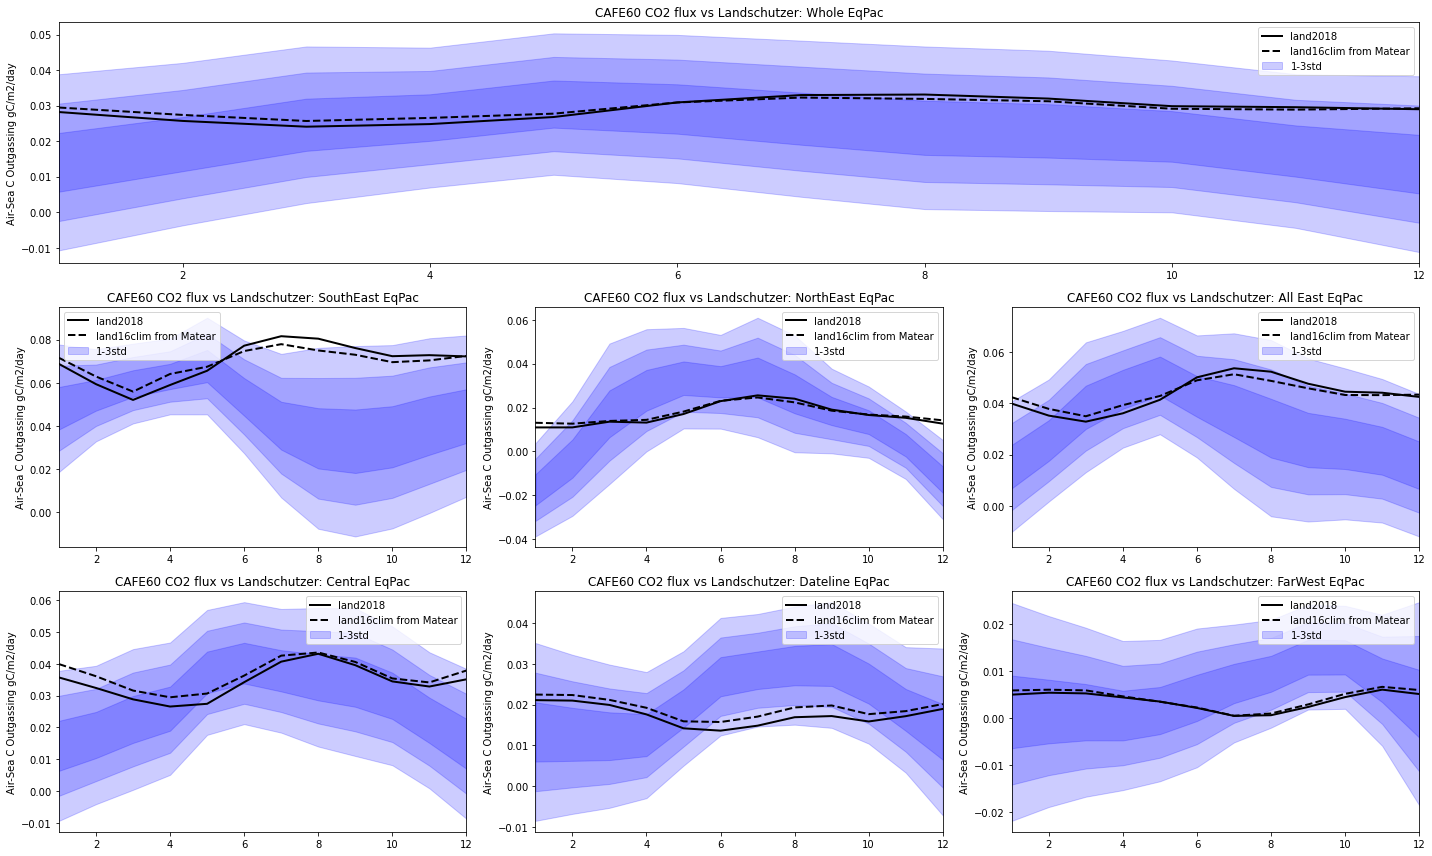

In [91]:
#They don't line up very well so lets check the seasonality

labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    cafe_seasonality=CAFE_CO2_flux_anth.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).stf10.groupby('time.month').mean()
 
    land_seasonality=landschutzer_CO2.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])
 

    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
        
    err=cafe_seasonality.std(dim='ensemble').mean(dim=['lat','lon'])
    m=cafe_seasonality.mean(['lat','lon','ensemble'])
    
    ax.fill_between(err.month,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*3),m-(err*3),alpha=0.2,color='blue')
    

    ax.plot(land_seasonality.month,land_seasonality,c='k',linewidth=2)
   
    olc=old_land_clim.fgco2_clim.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    olc['monthclim']=olc['monthclim']+1
    ax.plot(olc.monthclim,olc,c='k',linewidth=2,linestyle='--')
    
    #Ok we could plot the individual lines using seaborn. 
    
    #land_seasonality=land_seasonality.to_dataframe().reset_index()
    #seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
    
    #sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
    #sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')
        
        
    ax.set_xlim([1,12])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])
    ax.legend(['land2018','land16clim from Matear','1-3std'])
plt.tight_layout()

    
  
    


In [ ]:
#Ok the seasonality is terrible. Hmm. Its literally upside down .........

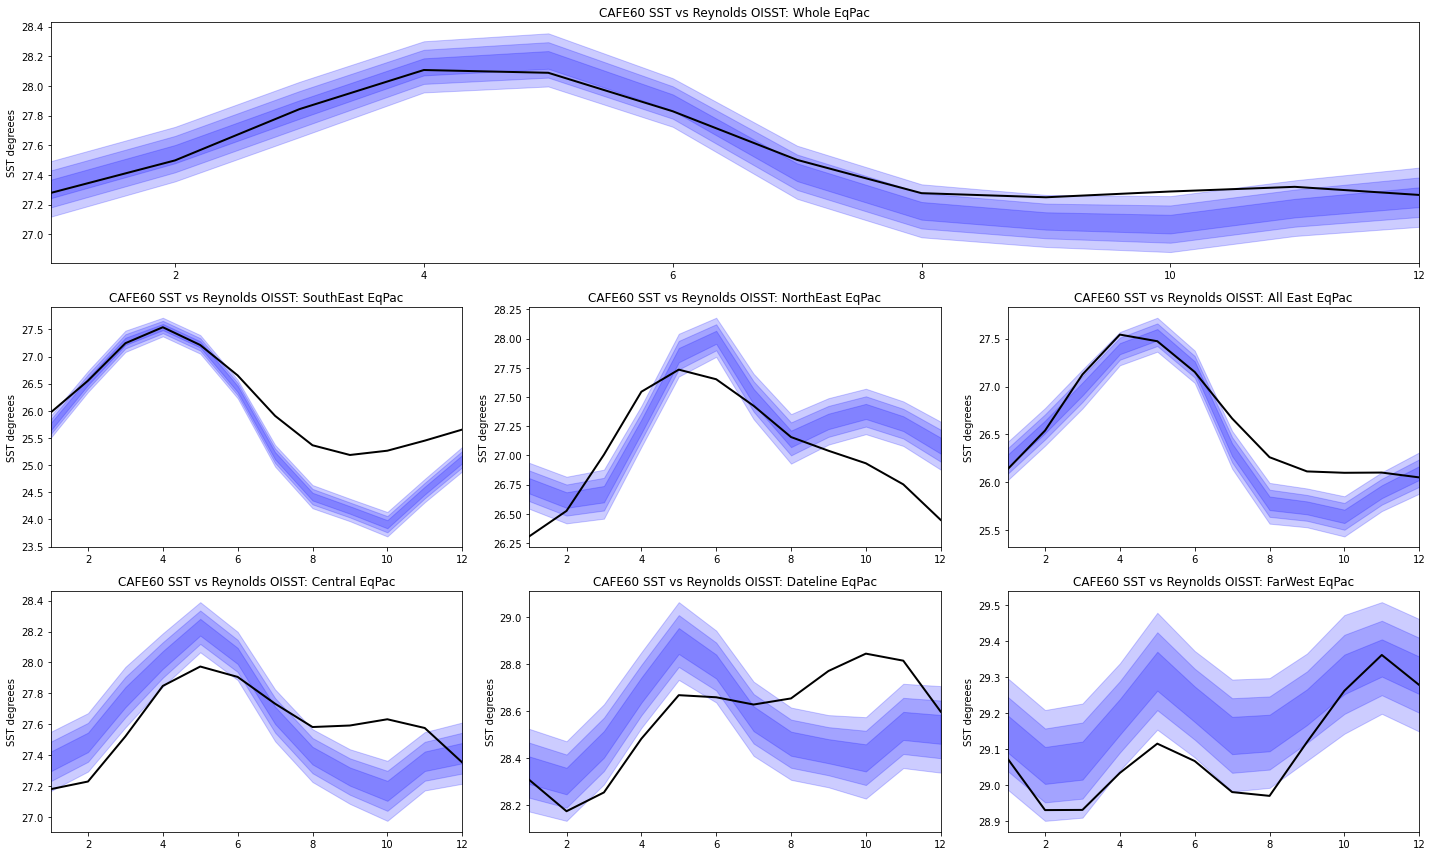

In [92]:
#OISST Seasonality
#They don't line up very well so lets check the seasonality

labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    cafe_seasonality=sst_cafe.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean()
 
    obs_seasonality=sst_obs.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])
 

    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
        
    err=cafe_seasonality.std(dim='ensemble').mean(dim=['lat','lon'])
    m=cafe_seasonality.mean(['lat','lon','ensemble'])
    
    ax.fill_between(err.month,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*3),m-(err*3),alpha=0.2,color='blue')
    

    ax.plot(obs_seasonality.month,obs_seasonality,c='k',linewidth=2)
   
    
    #Ok we could plot the individual lines using seaborn. 
    
    #land_seasonality=land_seasonality.to_dataframe().reset_index()
    #seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
    
    #sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
    #sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')
        
        
    ax.set_xlim([1,12])
    ax.set_ylabel('SST degreees')
    ax.set_title('CAFE60 SST vs Reynolds OISST: '+labels[i])
   # ax.legend(['land2018','land16clim from Matear','1-3std'])
plt.tight_layout()

    
  
    

In [46]:
#How can we look at ENSO? Can we use the raw months used previously... Probably need to calculate the SOI for each model....

In [6]:
def calc_longterm_trends(ds,startday=np.datetime64('2000-01-01'),endday=np.datetime64('2020-01-01')):
    hovmol=ds
    hovmol=hovmol.where(hovmol!=-0.9999,np.nan)
    hm=hovmol.interpolate_na(dim='time').sel(time=slice(startday,endday))
    months=hm.time

    dt_dates=pd.to_numeric(months.values.astype('datetime64[D]'))
    num_dates=dt_dates
    hm['time']=num_dates

    #This will calculate the per pixel trends and pvalues

    time=hm.time.values
    xx=np.concatenate(hm.T)
    #print(xx.shape)
    tr=[]
    pv=[]
    
    
    for i in range(xx.shape[0]):
        #print(xx[i,:])
        #print(xx[i],:)
        #print(xx.shape)
        stat=linregress(time,xx[i,:])
        #print(stat)
        tr.append(stat.slope*365)
        pv.append(stat.pvalue)

    tr=np.array(tr).reshape(len(hm.lon),len(hm.lat)).T
    pv=np.array(pv).reshape(len(hm.lon),len(hm.lat)).T

    hh=hm.copy()
    hh=hh.drop('time')
    hh['trend']=(['lat','lon'],tr)
    hh['pval']=(['lat','lon'],pv)
    return hh

In [ ]:
def make_sst_trends_netcdf():
    ens=[]
    for i in sst_cafe.ensemble.values:
        print(i)
        sst_cafe_tr=calc_longterm_trends(sst_cafe.sel(ensemble=i))
        ens.append(sst_cafe_tr)

    sst_cafe_tr=calc_longterm_trends(sst_cafe.mean(dim='ensemble'))
    ens.append(sst_cafe_tr)
    cafe_SST_trends=xr.concat(ens,dim='ensemble')
    cafe_SST_trends.to_netcdf('/scratch1/pit071/CAFE60/sst_trends_ens.nc')


In [155]:
make_sst_trends_netcdf()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


In [8]:
#Ok how about long term trends?

sst_obs_tr=calc_longterm_trends(sst_obs)
sst_trends=xr.open_dataset('/scratch1/pit071/CAFE60/sst_trends_ens.nc')

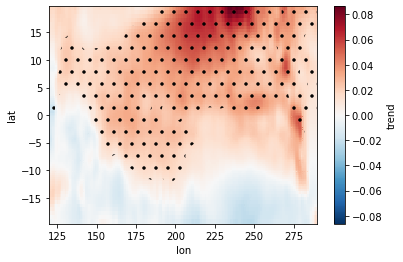

In [9]:
## OBSERVED SST TRENDS

cb=sst_obs_tr.trend.plot()
pv=sst_obs_tr.pval
plt.contourf(pv.lon,pv.lat,pv.values,colors='none',hatches=['.'],levels=[0,0.05])


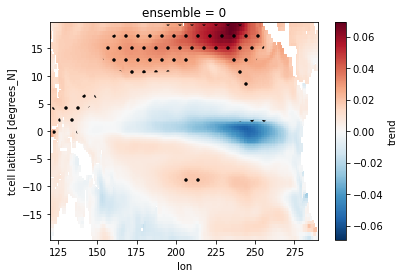

In [14]:
pv=sst_trends.sel(ensemble=0)
pv.trend.plot()
plt.contourf(pv.lon,pv.lat,pv.pval.values,colors='none',hatches=['.'],levels=[0,0.05])


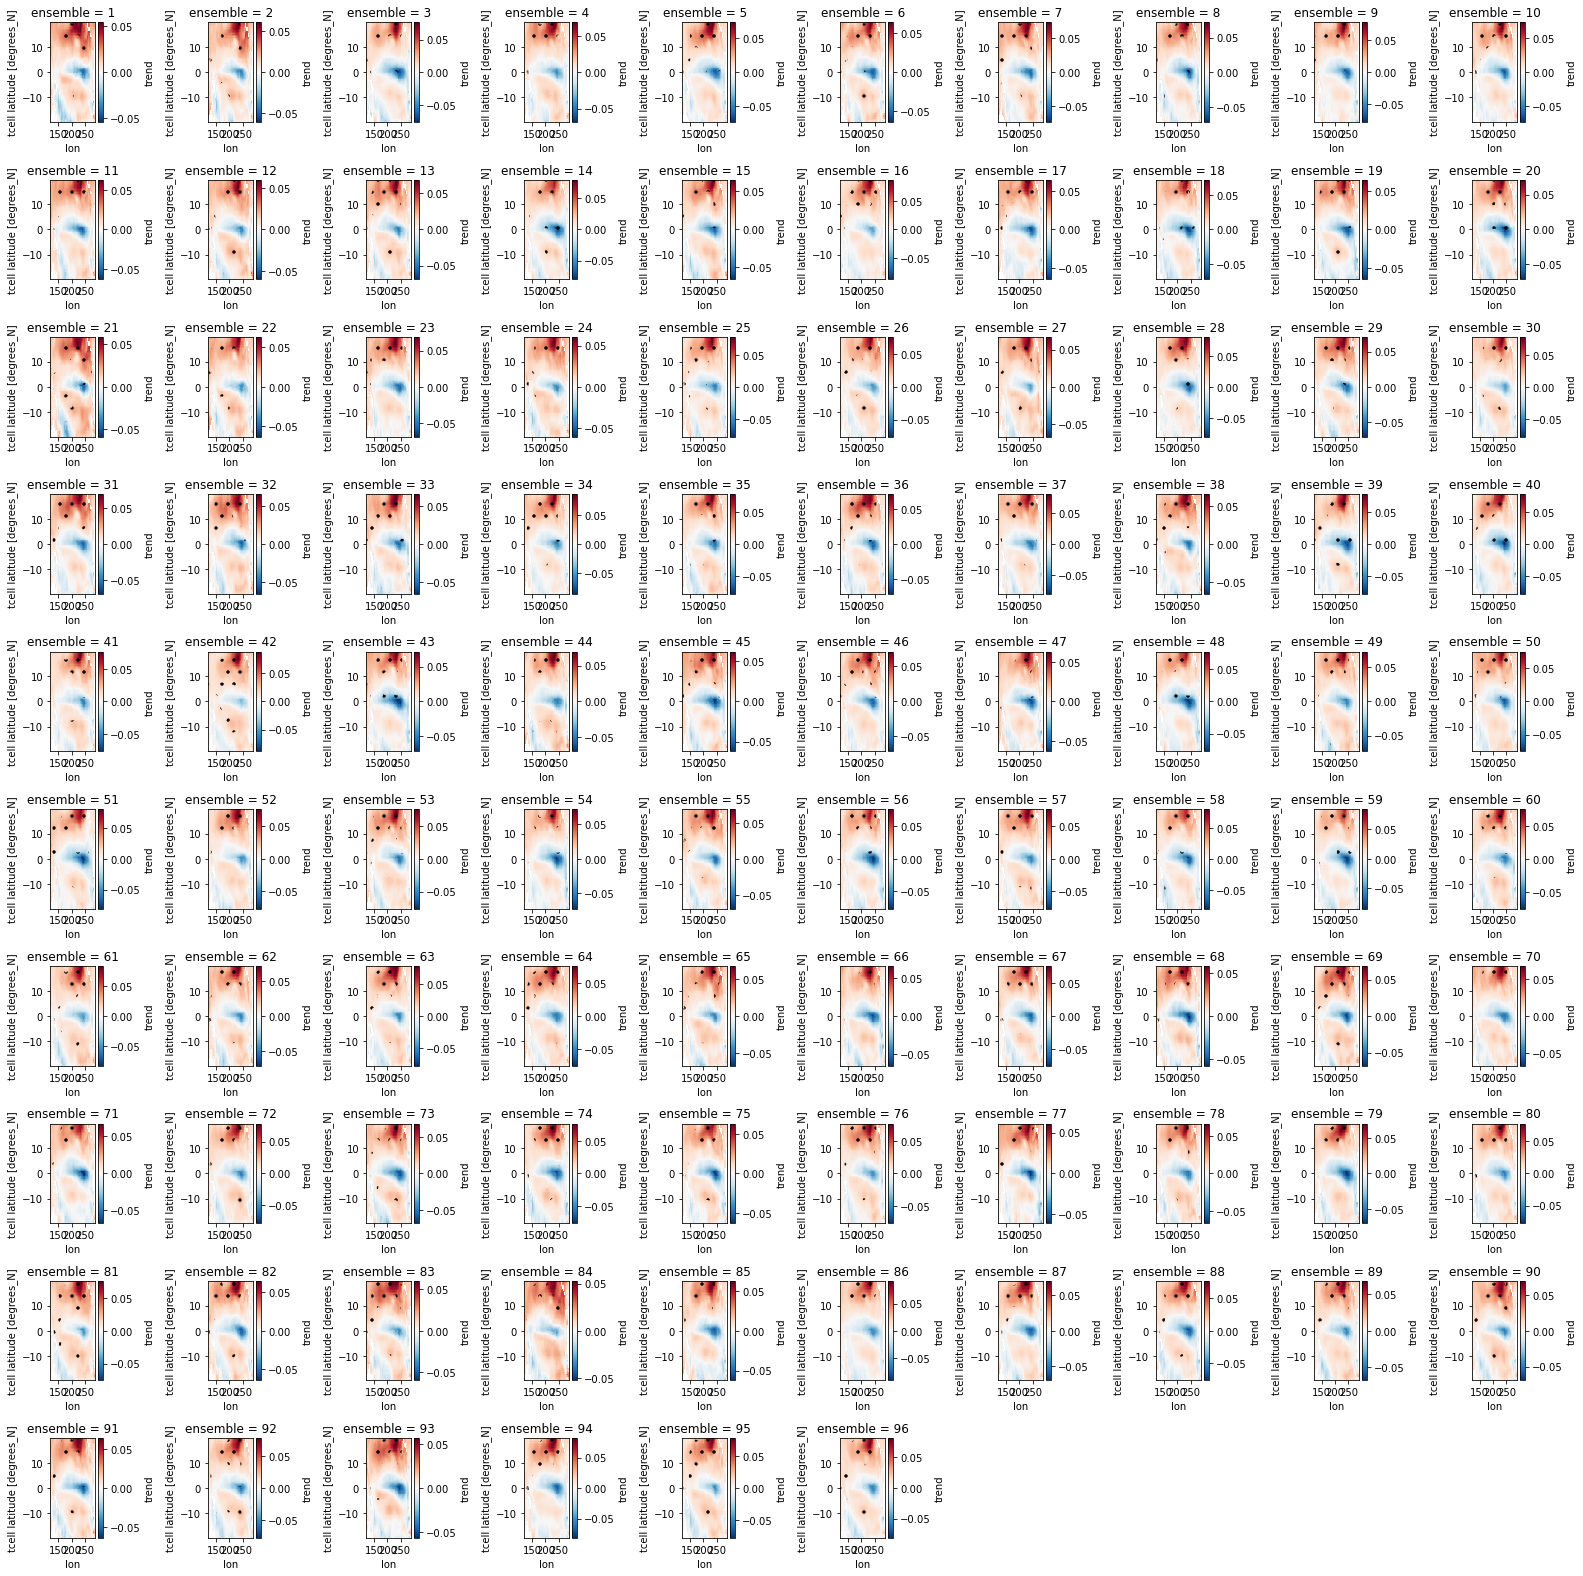

In [209]:
plt.figure(figsize=(22,22))
for i in np.arange(1,97):
    plt.subplot(10,10,i)
    pv=sst_trends.sel(ensemble=i)
    pv.trend.plot()
    plt.contourf(pv.lon,pv.lat,pv.pval.values,colors='none',hatches=['.'],levels=[0,0.05])

plt.tight_layout()    
plt.show()
    

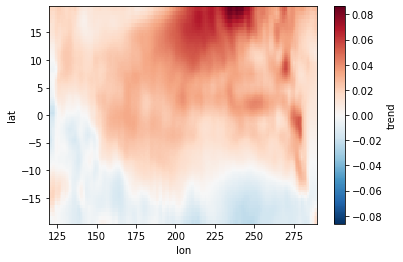

In [137]:
sst_obs_tr.trend.plot()

In [ ]:
sst_obs_tr.trend.plot()
plt.show()
sst_cafe_tr.trend.plot()
plt.show()

In [60]:
sst=xr.open_dataset('/scratch1/pit071/CAFE60/sst.nc')
soi=xr.open_dataset('/scratch1/pit071/CAFE60/soi.nc')
soi=soi.mean(dim='ensemble')
el_nino_dates=soi.where(soi<-1).dropna(dim='time').time
la_nina_dates=soi.where(soi>1).dropna(dim='time').time

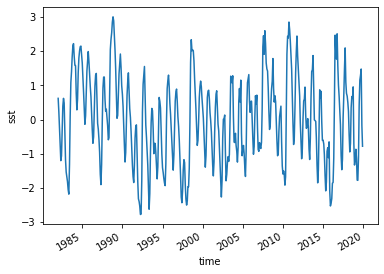

In [52]:
soi.sst.plot()

In [24]:
el_nino_dates

<xarray.DataArray 'time' (time: 100)>
array(['1983-08-01T00:00:00.000000000', '1983-09-01T00:00:00.000000000',
       '1983-10-01T00:00:00.000000000', '1983-11-01T00:00:00.000000000',
       '1983-12-01T00:00:00.000000000', '1984-01-01T00:00:00.000000000',
       '1984-02-01T00:00:00.000000000', '1984-03-01T00:00:00.000000000',
       '1984-07-01T00:00:00.000000000', '1984-08-01T00:00:00.000000000',
       '1984-09-01T00:00:00.000000000', '1984-10-01T00:00:00.000000000',
       '1984-11-01T00:00:00.000000000', '1984-12-01T00:00:00.000000000',
       '1985-01-01T00:00:00.000000000', '1985-02-01T00:00:00.000000000',
       '1985-08-01T00:00:00.000000000', '1985-09-01T00:00:00.000000000',
       '1985-10-01T00:00:00.000000000', '1985-11-01T00:00:00.000000000',
       '1985-12-01T00:00:00.000000000', '1986-09-01T00:00:00.000000000',
       '1986-10-01T00:00:00.000000000', '1987-09-01T00:00:00.000000000',
       '1987-10-01T00:00:00.000000000', '1988-07-01T00:00:00.000000000',
       '1988-08-01T00:00:00.000000000', '1988-09-01T00:00:00.000000000',
       '1988-10-01T00:00:00.000000000', '1988-11-01T00:00:00.000000000',
       '1988-12-01T00:00:00.000000000', '1989-01-01T00:00:00.000000000',
       '1989-02-01T00:00:00.000000000', '1989-03-01T00:00:00.000000000',
       '1989-08-01T00:00:00.000000000', '1989-09-01T00:00:00.000000000',
       '1989-10-01T00:00:00.000000000', '1989-11-01T00:00:00.000000000',
       '1990-09-01T00:00:00.000000000', '1990-10-01T00:00:00.000000000',
       '1992-08-01T00:00:00.000000000', '1992-09-01T00:00:00.000000000',
       '1992-10-01T00:00:00.000000000', '1995-09-01T00:00:00.000000000',
       '1995-10-01T00:00:00.000000000', '1998-07-01T00:00:00.000000000',
       '1998-08-01T00:00:00.000000000', '1998-09-01T00:00:00.000000000',
       '1998-10-01T00:00:00.000000000', '1998-11-01T00:00:00.000000000',
       '1998-12-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '1999-10-01T00:00:00.000000000', '2003-07-01T00:00:00.000000000',
       '2003-08-01T00:00:00.000000000', '2003-09-01T00:00:00.000000000',
       '2003-10-01T00:00:00.000000000', '2004-10-01T00:00:00.000000000',
       '2005-08-01T00:00:00.000000000', '2005-09-01T00:00:00.000000000',
       '2005-10-01T00:00:00.000000000', '2007-07-01T00:00:00.000000000',
       '2007-08-01T00:00:00.000000000', '2007-09-01T00:00:00.000000000',
       '2007-10-01T00:00:00.000000000', '2007-11-01T00:00:00.000000000',
       '2007-12-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2008-02-01T00:00:00.000000000', '2008-09-01T00:00:00.000000000',
       '2008-10-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1983-08-01 1983-09-01 ... 2019-10-01

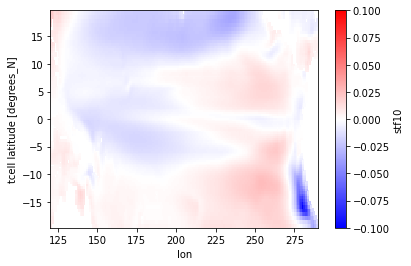

In [41]:
(CAFE_CO2_flux_anth.sel(time=la_nina_dates).stf10.mean(dim=['time','ensemble'])-CAFE_CO2_flux_anth.stf10.mean(dim=['time','ensemble'])).plot(vmin=-0.1,vmax=0.1,cmap='bwr')

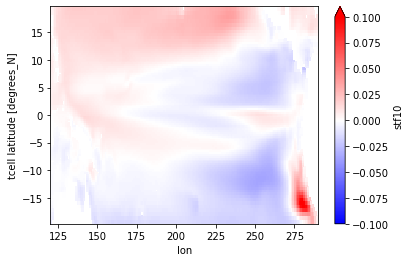

In [39]:
(CAFE_CO2_flux_anth.sel(time=el_nino_dates).stf10.mean(dim=['time','ensemble'])-CAFE_CO2_flux_anth.stf10.mean(dim=['time','ensemble'])).plot(vmin=-0.1,vmax=0.1,cmap='bwr')

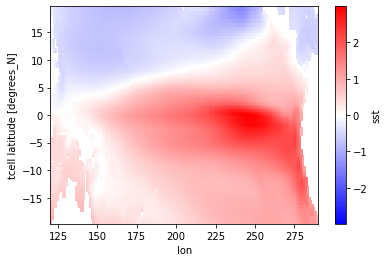

In [62]:
(sst.sel(time=el_nino_dates).sst.mean(dim=['time','ensemble'])-sst.sst.mean(dim=['time','ensemble'])).plot(cmap='bwr')

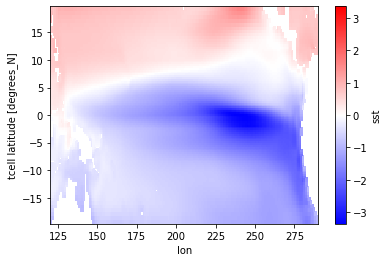

In [63]:
(sst.sel(time=la_nina_dates).sst.mean(dim=['time','ensemble'])-sst.sst.mean(dim=['time','ensemble'])).plot(cmap='bwr')

In [76]:
best_model=xr.open_dataset('../pz_best_par.nc')

In [91]:
best_model

<xarray.Dataset>
Dimensions:   (grid_x_T: 360, grid_y_T: 300)
Coordinates:
  * grid_y_T  (grid_y_T) float32 -77.876625 -77.629715 ... 89.324005 89.774475
  * grid_x_T  (grid_x_T) float32 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
Data variables:
    muezbio   (grid_y_T, grid_x_T) float32 nan nan nan nan ... nan nan nan nan
    muepsbio  (grid_y_T, grid_x_T) float32 ...

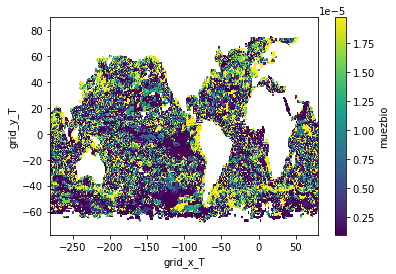

In [93]:
best_model.muezbio.plot() 

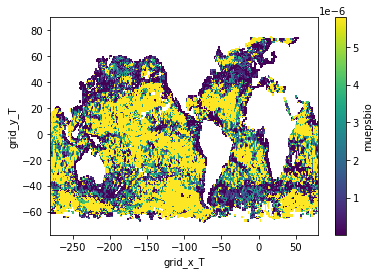

In [95]:
best_model.muepsbio.plot()

In [96]:
best_model.muepsbio.

<xarray.DataArray 'muepsbio' (grid_y_T: 300, grid_x_T: 360)>
[108000 values with dtype=float32]
Coordinates:
  * grid_y_T  (grid_y_T) float32 -77.876625 -77.629715 ... 89.324005 89.774475
  * grid_x_T  (grid_x_T) float32 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5

In [92]:
best_model.muepsbio.sel(grid_y_T=0,grid_x_T=-150,method='nearest')#.sel()

<xarray.DataArray 'muepsbio' ()>
array(5.787037e-06, dtype=float32)
Coordinates:
    grid_y_T  float32 0.16620922
    grid_x_T  float32 -149.5

In [57]:
sst.sel(time=la_nina_dates).time

<xarray.DataArray 'time' (time: 111)>
array(['1982-05-01T00:00:00.000000000', '1982-06-01T00:00:00.000000000',
       '1982-12-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1983-03-01T00:00:00.000000000',
       '1983-04-01T00:00:00.000000000', '1983-05-01T00:00:00.000000000',
       '1983-06-01T00:00:00.000000000', '1987-04-01T00:00:00.000000000',
       '1987-05-01T00:00:00.000000000', '1987-06-01T00:00:00.000000000',
       '1990-05-01T00:00:00.000000000', '1991-04-01T00:00:00.000000000',
       '1991-05-01T00:00:00.000000000', '1991-06-01T00:00:00.000000000',
       '1991-07-01T00:00:00.000000000', '1991-12-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1992-02-01T00:00:00.000000000',
       '1992-03-01T00:00:00.000000000', '1992-04-01T00:00:00.000000000',
       '1992-05-01T00:00:00.000000000', '1992-06-01T00:00:00.000000000',
       '1993-03-01T00:00:00.000000000', '1993-04-01T00:00:00.000000000',
       '1993-05-01T00:00:00.000000000', '1993-06-01T00:00:00.000000000',
       '1994-04-01T00:00:00.000000000', '1994-05-01T00:00:00.000000000',
       '1994-06-01T00:00:00.000000000', '1994-12-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1996-04-01T00:00:00.000000000', '1996-05-01T00:00:00.000000000',
       '1996-06-01T00:00:00.000000000', '1997-03-01T00:00:00.000000000',
       '1997-04-01T00:00:00.000000000', '1997-05-01T00:00:00.000000000',
       '1997-06-01T00:00:00.000000000', '1997-07-01T00:00:00.000000000',
       '1997-08-01T00:00:00.000000000', '1997-09-01T00:00:00.000000000',
       '1997-10-01T00:00:00.000000000', '1997-11-01T00:00:00.000000000',
       '1997-12-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1998-02-01T00:00:00.000000000', '1998-03-01T00:00:00.000000000',
       '1998-04-01T00:00:00.000000000', '1998-05-01T00:00:00.000000000',
       '2000-04-01T00:00:00.000000000', '2000-05-01T00:00:00.000000000',
       '2000-06-01T00:00:00.000000000', '2001-04-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2002-03-01T00:00:00.000000000', '2002-04-01T00:00:00.000000000',
       '2002-05-01T00:00:00.000000000', '2002-06-01T00:00:00.000000000',
       '2002-12-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2003-02-01T00:00:00.000000000', '2003-03-01T00:00:00.000000000',
       '2003-04-01T00:00:00.000000000', '2003-05-01T00:00:00.000000000',
       '2004-05-01T00:00:00.000000000', '2004-12-01T00:00:00.000000000',
       '2005-04-01T00:00:00.000000000', '2005-05-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-06-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2012-05-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-11-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T0

In [46]:
land_seasonality=landschutzer_CO2.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])
 

In [66]:
!git status #Oh you can actually use git within jupyter...

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	__pycache__/
	bilinear_40x170_98x170.nc
	dask-worker-space/

nothing added to commit but untracked files present (use "git add" to track)


In [47]:
r_err=xr.open_dataset('/scratch1/pit071/CO2_flux_error.nc')

In [48]:
r_err

In [63]:
r_err.region_name.values

array(['Whole EqPac', 'SouthEast EqPac', 'NorthEast EqPac',
       'All East EqPac', 'Central EqPac', 'Dateline EqPac',
       'FarWest EqPac'], dtype=object)

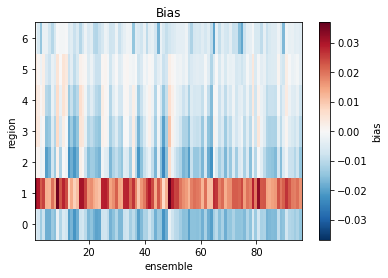

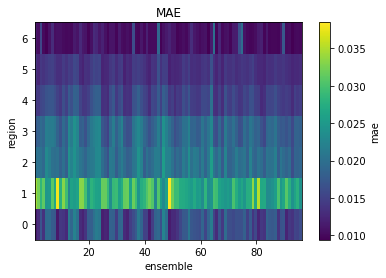

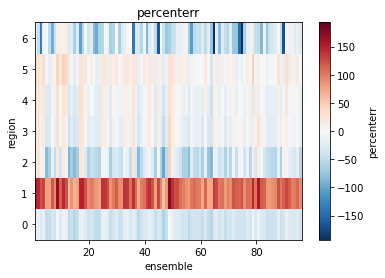

In [62]:
r_err.bias.plot(),plt.title('Bias')
plt.show()
r_err.mae.plot(),plt.title('MAE')
plt.show()
r_err.percenterr.plot(),plt.title('percenterr')
plt.show()
#Ok so CAFE overestimates the  North East way more than it should be. Something to do with the N-S gradient in the east Pacific not being represented very well?

#Regions are shown above

Text(0.5, 1.0, 'Percent error relative to landshutzer for different regions')

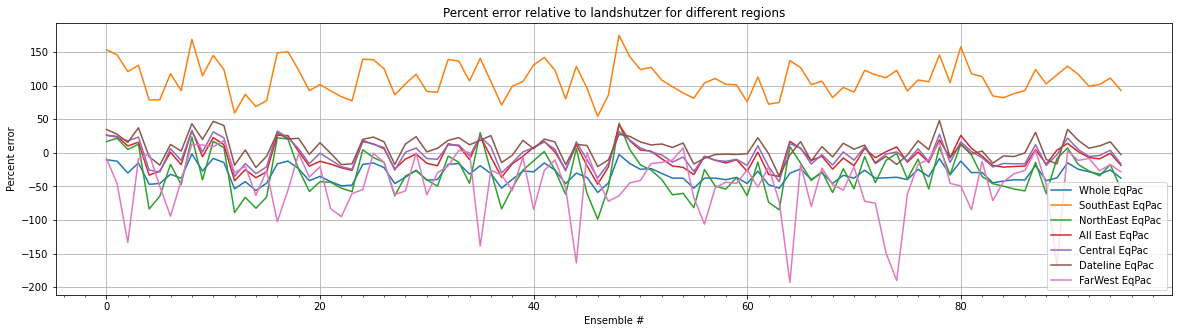

In [58]:

plt.figure(figsize=(20,5))
ax=plt.subplot(111)
ax.plot(r_err.percenterr.T)
plt.legend(r_err.region_name.values)
ax.grid()
ax.xaxis.set_minor_locator(MultipleLocator(2))
plt.xlabel('Ensemble #')
plt.ylabel('Percent error')
plt.title('Percent error relative to landshutzer for different regions')

Text(0.5, 1.0, 'Percent error relative to landshutzer for different regions')

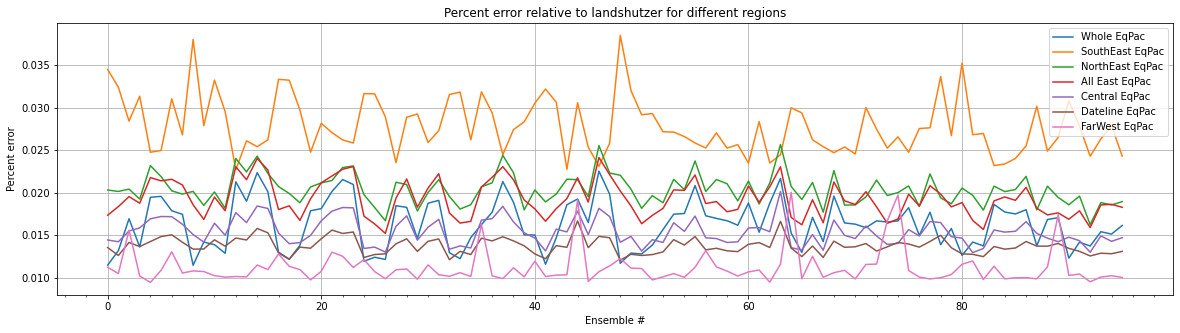

In [59]:

plt.figure(figsize=(20,5))
ax=plt.subplot(111)
ax.plot(r_err.mae.T)
plt.legend(r_err.region_name.values)
ax.grid()
ax.xaxis.set_minor_locator(MultipleLocator(2))
plt.xlabel('Ensemble #')
plt.ylabel('Mean Absolute error')
plt.title('Mean Absolute error relative to landshutzer for different regions')

Text(0.5, 1.0, 'Bias relative to landshutzer for different regions')

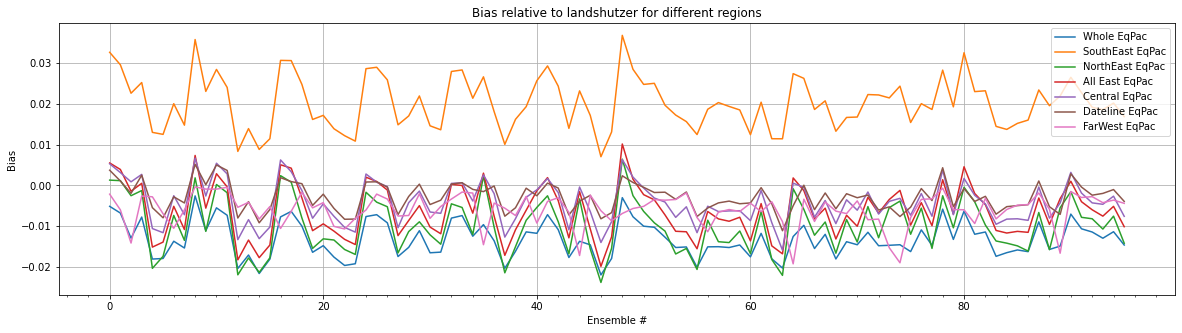

In [61]:

plt.figure(figsize=(20,5))
ax=plt.subplot(111)
ax.plot(r_err.bias.T)
plt.legend(r_err.region_name.values)
ax.grid()
ax.xaxis.set_minor_locator(MultipleLocator(2))
plt.xlabel('Ensemble #')
plt.ylabel('Bias')
plt.title('Bias relative to landshutzer for different regions')

In [ ]:
#Ok need some more thinking before moving onto these variables.


In [115]:
#NPP
dat=xr.open_dataset('/scratch1/pit071/CAFE60/eqpac_BGC.nc')
dat['time']=np.array(dat.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
primary=dat.pprod_gross_2d
primary_mean_2d=primary.mean(dim=['time','ensemble'])
primary_mean=primary.mean(dim=['ensemble'])
primary_std=primary.std(dim=['ensemble'])

export=dat.export_prod
export_mean=export.mean(dim=['time','ensemble'])

<ipython-input-115-a2f8c05ec051>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dat['time']=np.array(dat.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [148]:
#Obs Data
NPP_sat_CAFE=xr.open_dataset('/scratch1/pit071/carbon_data_ch2/carbon/avg_npp_rg_cafe.nc')/1000
fratios=xr.open_dataset('/scratch1/pit071/carbon_data_ch2/carbon/fratios.nc')
new_production=(cafe*fratios.laws2011a).avg_npp/1000

In [114]:
primary.time

<xarray.DataArray 'time' (time: 720)>
array([cftime.DatetimeJulian(1960, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeJulian(1960, 2, 15, 12, 0, 0, 0),
       cftime.DatetimeJulian(1960, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeJulian(2019, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeJulian(2019, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeJulian(2019, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
Attributes:
    bounds:          time_bounds
    calendar_type:   JULIAN
    cartesian_axis:  T
    long_name:       time

In [99]:
primary_mean_2d.nbytes/1e9

0.00013328

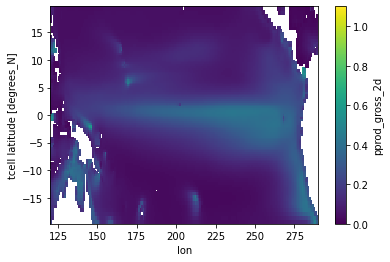

In [89]:
#MODEL NPP PLOT
primary_mean_2d.plot(vmin=0,vmax=1.1)

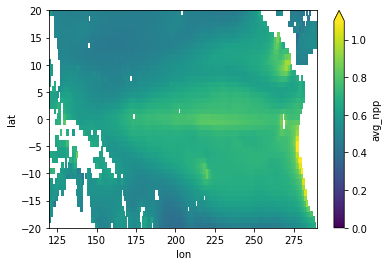

In [143]:
#COnfusing should change this to 'Satellite NPP (CAFE algorithm haha)'
(NPP_sat_CAFE.mean(dim='time')).avg_npp.plot(vmin=0,vmax=1.1) #mgC/day
plt.show()

In [151]:
land_co2_mean.values

array([0.07451623, 0.07085969, 0.06608291, 0.06264424, 0.06525498,
       0.0707434 , 0.07144363, 0.07108284, 0.06727351, 0.06982681,
       0.07629354, 0.087553  , 0.09245205, 0.09155046, 0.08608676,
       0.08614666, 0.08951579, 0.09173999, 0.0913268 , 0.0870156 ,
       0.0793154 , 0.07754592, 0.08062526, 0.09023592, 0.09695911,
       0.09572831, 0.09297854, 0.09119106, 0.09227069, 0.09441654,
       0.09282784, 0.08387648, 0.07843567, 0.07678742, 0.07925111,
       0.08653071, 0.09157225, 0.09070301, 0.08557998, 0.08417983,
       0.08686376, 0.09029726, 0.08690144, 0.08024794, 0.0754411 ,
       0.07188295, 0.07520128, 0.08358198, 0.09084544, 0.08842847,
       0.08349339, 0.0804982 , 0.08274617, 0.08421113, 0.08326273,
       0.07638012, 0.06919985, 0.06583334, 0.07345253, 0.08209425,
       0.0866949 , 0.08453197, 0.07834601, 0.07636242, 0.0787053 ,
       0.08266561, 0.08081851, 0.07895384, 0.0771037 , 0.07507818,
       0.07655429, 0.08428545, 0.08940499, 0.08592485, 0.08113

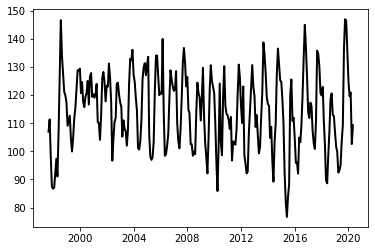

0
1
2
3
4
5
6


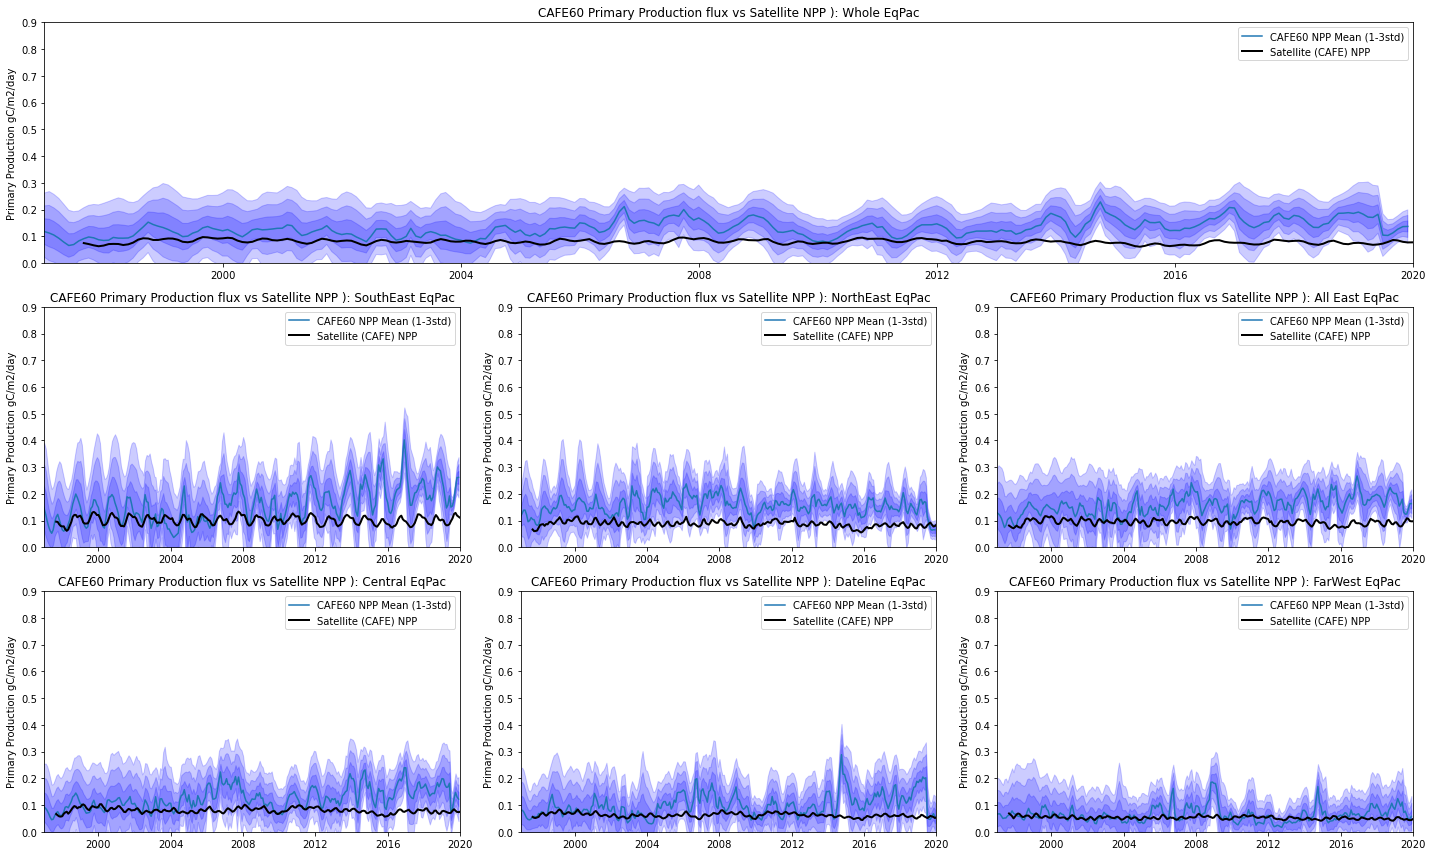

In [152]:
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    cafe_co2_std=primary.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    cafe_co2_mean=primary.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    land_co2_std=new_production.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    land_co2_mean=new_production.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])

    err=cafe_co2_mean.std(dim='ensemble')
    m=cafe_co2_mean.mean(dim='ensemble')
    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
    ax.plot(m.time,m)
    ax.fill_between(err.time.values,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m+(err*3),m-(err*3),alpha=0.2,color='blue')
    ax.plot(land_co2_mean.time.values,land_co2_mean.values,c='k',linewidth=2)
    ax.legend(['CAFE60 NPP Mean (1-3std)','Satellite (CAFE) NPP'])
    ax.set_xlim(['1997-01-01','2020-01-01'])
    ax.set_ylim([0,0.9])
    ax.set_ylabel('Primary Production gC/m2/day')
    #ax.set_title('CO2 flux comparisons')
    ax.set_title('CAFE60 Primary Production flux vs Satellite NPP ): '+labels[i])
    print(i)
plt.tight_layout()

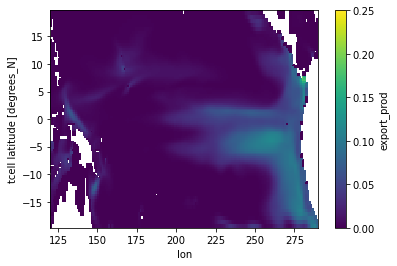

In [88]:
export_mean.plot(vmin=0,vmax=0.25)

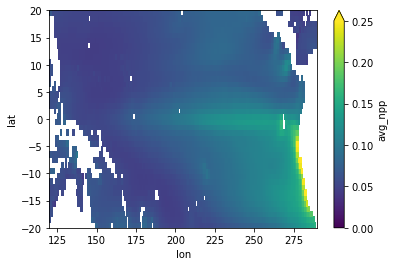

In [86]:
(new_production.mean(dim='time')/1000).plot(vmin=0,vmax=0.25) #mgC/day
plt.show()

In [147]:
BGC_monthly

<xarray.Dataset>
Dimensions:          (ensemble: 96, scalar_axis: 1, st_ocean: 50, time: 720, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * ensemble         (ensemble) int32 1 2 3 4 5 6 7 8 ... 90 91 92 93 94 95 96
  * scalar_axis      (scalar_axis) float64 0.0
  * st_ocean         (st_ocean) float64 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * time             (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean         (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean         (yt_ocean) float64 -77.88 -77.63 -77.38 ... 89.32 89.77
Data variables:
    adic             (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    alk              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    caco3            (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    caco3_sediment   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    det              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    det_sediment     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    dic              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    export_inorg     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    export_prod      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    fe               (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    no3              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    o2               (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    paco2            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    pco2             (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    phy              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    pprod_gross      (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    pprod_gross_2d   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    stf03            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    stf07            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    stf10            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_adic     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_alk      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_caco3    (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_det      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_dic      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_fe       (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_no3      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<ch

In [146]:
BGC_monthly = xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/',consolidated=True)

In [378]:

pprod=BGC_monthly.pprod_gross_2d

pprod=pprod.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20)).mean(dim=['time','ensemble'])
pprod.plot()


<xarray.Dataset>
Dimensions:         (ensemble: 96, time: 720, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * ensemble        (ensemble) int32 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * time            (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean        (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean        (yt_ocean) float64 -77.88 -77.63 -77.38 ... 89.32 89.77
Data variables:
    stf10           (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    pprod_gross_2d  (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
Attributes:
    calendar:                 julian
    cm-enkf_source:          commit 0141830a243704acbf6d8c8c843b161a39ec39fa
    contact_name:            Decadal Activity 1 - Data Assimilation
    control_name:            c5
    creation_date:           Sun Dec  1 23:38:56 2019
    data_assimilation_name:  d60
    description:             CAFE coupled ocean-atmosphere-seaice reanalysis ...
    enkf-c_source:           EnKF version 1.92.4
    ens_member_number:       1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...
    experiment_start_date:   19600101
    filename:                ocean_bgc_month.zarr
    forecast_name:           not applicable
    further_info_url:        https://research.csiro.au/dfp/
    grid_tile:               1
    grid_type:               mosaic
    institution:             CSIRO CAFE
    licence:                 ### To be advised ###
    metadata_description:    \n\tEach of the metadata keys added via the CAFE...
    model_source:            commit 2abb29f4384e68777721fa657850587f28efd85a
    nominal_resoltuion:      Atmosphere delta lat = 2.02degrees ; Atmosphere ...
    perturbation_name:       not applicable
    references:              OKane, T.J., Sandery, P.A., Monselesan, D.P., Sa...
    run_variant_name:        data assimilation
    title:                   AccessOcean-AM2

In [ ]:
export=BGC_monthly.export_prod
export_flux=((export*6.625*12*86400)/1000) #So *6.625 to work out carbon moles, * 12 to grams and units are seconds so calculate to a day and 1000 for mmol to mol. #xr.apply_ufunc(moles_to_carbon,, dask='parallelized')

In [ ]:
BGC_monthly.phy

In [95]:
BGC_monthly.phy

<xarray.DataArray 'phy' (time: 720, ensemble: 96, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
dask.array<zarr, shape=(720, 96, 50, 300, 360), dtype=float32, chunksize=(1, 96, 3, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * st_ocean  (st_ocean) float64 5.0 15.0 25.0 ... 5.166e+03 5.499e+03 5.831e+03
  * time      (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    cell_methods:  time: mean
    coordinates:   geolon_t geolat_t
    long_name:     phy
    units:         mmol/m^3
    valid_range:   [-1000000.0, 1000000.0]

In [94]:
chl

<xarray.DataArray 'phy' (yt_ocean: 98, xt_ocean: 140)>
dask.array<mean_agg-aggregate, shape=(98, 140), dtype=float32, chunksize=(98, 140), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -219.5 -218.5 -217.5 ... -82.5 -81.5 -80.5
  * yt_ocean  (yt_ocean) float64 -19.36 -18.59 -17.85 ... 17.85 18.59 19.36

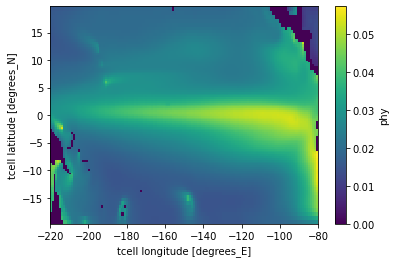

In [93]:
BGC_monthly = xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/',consolidated=True)
chl=BGC_monthly.phy.sel(st_ocean=slice(0,20)).mean(dim='time').sum(dim='st_ocean')
chl=chl.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20))
chl=(chl/14)*893.51
chl=chl.mean(dim=['ensemble'])
#or chl.sel(ensemble=5)
chl.plot()
#CHLOROPHYLL

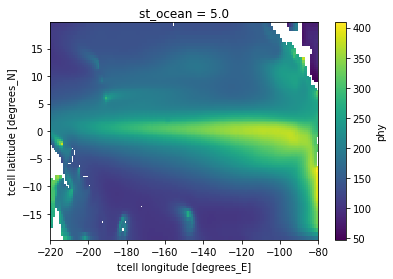

In [98]:
BGC_monthly = xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/',consolidated=True)
chl=BGC_monthly.phy.sel(st_ocean=5).mean(dim='time')
chl=chl.sel(xt_ocean=slice(-220,-80),yt_ocean=slice(-20,20))
chl=(chl)*893.51
chl=chl.mean(dim=['ensemble'])
#or chl.sel(ensemble=5)
chl.plot()
#CHLOROPHYLL

In [96]:
0.05*1000

50.0